In [1]:
import cv2
import numpy as np
import pandas as pd
import imageio.v3 as io
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Configuramos pandas para mostrar más columnas y filas.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


data = pd.read_csv("/content/drive/MyDrive/data_KC.csv", sep = ";" , header=0)
data.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,Price
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,150.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,169.0
2,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,750.0
3,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,Beautiful private room overlooking scenic view...,2017-08-27,t,t,100%,2017-06-07,t,2017-09-05,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0,85.0
4,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,LA,Warm and cozy studio with full kitchen and bat...,2017-03-10,t,f,100%,2017-03-03,t,2017-04-21,33.980454,-118.462821,Beach Town Studio and Parking!!!11h,NaN,15,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0,83.0


In [4]:
# Eliminamos las columnas que no nos aportan más información. Podemos quitar neighbourhood y quedarnos con zipcode que tiene menos nulos.
data = data.drop(['id','description','thumbnail_url','amenities','name','first_review','last_review','neighbourhood','host_since','latitude','longitude','city'], axis=1)

In [5]:
# print(data.describe())
print(data.info())
# print(data.isnull().any())
print(data.iloc[1])


# Calculamos la cantidad de valores nulos en cada columna.
print(data.shape)
null_counts = data.isnull().sum()
print("Cantidad de valores nulos por columna:")
print(null_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               2135 non-null   float64
 1   property_type           2135 non-null   object 
 2   room_type               2135 non-null   object 
 3   accommodates            2135 non-null   int64  
 4   bathrooms               2128 non-null   float64
 5   bed_type                2135 non-null   object 
 6   cancellation_policy     2135 non-null   object 
 7   cleaning_fee            2135 non-null   bool   
 8   host_has_profile_pic    2125 non-null   object 
 9   host_identity_verified  2125 non-null   object 
 10  host_response_rate      1488 non-null   object 
 11  instant_bookable        2135 non-null   object 
 12  number_of_reviews       2135 non-null   int64  
 13  review_scores_rating    1589 non-null   float64
 14  zipcode                 2111 non-null   

In [6]:
#borramos los 24 registros sin zipcode. No podemos clasificarlos.
data = data.dropna(subset=['zipcode'])

#convertimos la columna host_response_rate que es un objeto un tipo float.
data['host_response_rate'] = data['host_response_rate'].astype(str)
data['host_response_rate'] = data['host_response_rate'].str.replace('%', '')
data['host_response_rate'] = data['host_response_rate'].str.replace('nan', '0')
data['host_response_rate'] = data['host_response_rate'].astype(float)


#columnas númericas, sustituimos sus nulos por la media.
cols_with_nulls_1 = ['bathrooms','review_scores_rating','bedrooms','beds']

#columnas catégoricas, sustituimos sus nulos por la moda.
cols_with_nulls_2 = ['host_has_profile_pic','host_identity_verified']

for col in cols_with_nulls_1:
  data[col] = data[col].fillna(data[col].mean())

for col in cols_with_nulls_2:
  data[col] = data[col].fillna(data[col].mode()[0])


# Calculamos la cantidad de valores nulos en cada columna.
print(data.shape)
null_counts = data.isnull().sum()
print("Cantidad de valores nulos por columna:")
print(null_counts)



(2111, 18)
Cantidad de valores nulos por columna:
log_price                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
Price                     0
dtype: int64


<ipython-input-6-082509a4c161>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['host_response_rate'] = data['host_response_rate'].astype(str)
<ipython-input-6-082509a4c161>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['host_response_rate'] = data['host_response_rate'].str.replace('%', '')
<ipython-input-6-082509a4c161>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [7]:
# Vemos cúantas clases tienen cada variable catégorica, para ver si utilizamos one hot encoding u otra técnica en el caso de que haya demasiadas clases.
print(data.apply(lambda x: len(x.unique())))

# Si utilizamos one hot encoding aumenta demasiado la dimensionalidad del problema.
col_binarias = ['cleaning_fee','host_has_profile_pic','host_identity_verified','instant_bookable']
for col in col_binarias:
  data[col] = data[col].astype(str)
  data[col] = data[col].str.replace('t', '1')
  data[col] = data[col].str.replace('f', '0')
  data[col] = data[col].str.replace('True', '1')
  data[col] = data[col].str.replace('False', '0')
  data[col] = data[col].astype(float)

# Creamos el mapa.
categorical = ['property_type','room_type', 'bed_type','cancellation_policy','zipcode']

mean_map = {}
for c in categorical:
    mean = data.groupby(c)['Price'].mean()
    data[c] = data[c].map(mean)
    mean_map[c] = mean


print(data.iloc[1])

log_price                 267
property_type              20
room_type                   3
accommodates               16
bathrooms                  13
bed_type                    5
cancellation_policy         4
cleaning_fee                2
host_has_profile_pic        2
host_identity_verified      2
host_response_rate         44
instant_bookable            2
number_of_reviews         160
review_scores_rating       38
zipcode                   417
bedrooms                    9
beds                       12
Price                     267
dtype: int64
log_price                   5.129899
property_type             144.777155
room_type                 213.682597
accommodates                7.000000
bathrooms                   1.000000
bed_type                  155.499027
cancellation_policy       169.141204
cleaning_fee                1.000000
host_has_profile_pic        1.000000
host_identity_verified      0.000000
host_response_rate        100.000000
instant_bookable            1.000000
num

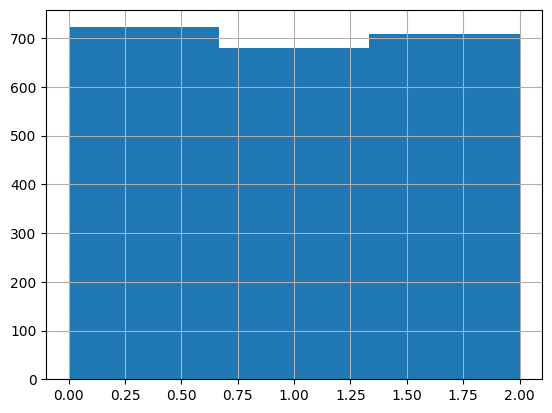

In [8]:
def cambiar_etiquetas_clasificacion(df, rangos):
  # En este caso vamos a elegir 3 rangos: barato/medio/caro.
  y_class = []
  for y in data['Price']:
    if y <= rangos[0]:
      y_class.append(0) # Rango más barato
    elif rangos[0] < y <= rangos[1]:
      y_class.append(1) # Rango intermedio
    else:
      y_class.append(2)
  y_class = pd.Series(y_class)
  y_class.hist(bins=3)
  data["price_clases"] = y_class
  return data

# Intentamos que las tres clases esten equilibradas.
data = cambiar_etiquetas_clasificacion(data, rangos = [86.0, 150.0])


#borramos los 24 registros sin zipcode. No podemos clasificarlos. Hay que ver por qué no se clasifican.
data = data.dropna(subset=['price_clases'])

In [9]:
from sklearn.model_selection import train_test_split

# Dividimos los datos
def crear_particiones(df):
  # Seleccionamos las columnas de los atributos:
  x_completo = data

  y_completo = df['price_clases']


  x_train, x_test, y_train, y_test = train_test_split(x_completo, y_completo, test_size=0.25,
                                                        random_state=42,
                                                        shuffle=True,
                                                        stratify=y_completo)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                      test_size=0.15,
                                                      random_state=42,
                                                      shuffle=True,
                                                      stratify=y_train)

  return x_train, x_test, y_train, y_test, x_val,y_val

In [10]:
x_train, x_test, y_train, y_test, x_val,y_val = crear_particiones(data)
print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(1331, 19) (235, 19) (523, 19)
(1331,) (235,) (523,)


In [11]:
y_train.head()

1398    2.0
793     2.0
535     1.0
1430    0.0
90      0.0
Name: price_clases, dtype: float64

In [12]:
idx_train = y_train.index.values
idx_val = y_val.index.values
idx_test = y_test.index.values

In [13]:
from tensorflow.keras.utils import to_categorical

# convertimos las etiquetas a onehot
# Convertimos a dataframe por coherencia con clasificación:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
# Convertimos a df:
y_train = pd.DataFrame(y_train, columns=["bajo","medio", "alto"])
y_train.index = idx_train
y_val = pd.DataFrame(y_val, columns=["bajo","medio", "alto"])
y_val.index = idx_val
y_test = pd.DataFrame(y_test, columns=["bajo","medio", "alto"])
y_test.index = idx_test


In [14]:
y_val.head()
print(data.iloc[1])

log_price                   5.129899
property_type             144.777155
room_type                 213.682597
accommodates                7.000000
bathrooms                   1.000000
bed_type                  155.499027
cancellation_policy       169.141204
cleaning_fee                1.000000
host_has_profile_pic        1.000000
host_identity_verified      0.000000
host_response_rate        100.000000
instant_bookable            1.000000
number_of_reviews           6.000000
review_scores_rating       93.000000
zipcode                   234.750000
bedrooms                    3.000000
beds                        3.000000
Price                     169.000000
price_clases                2.000000
Name: 1, dtype: float64


In [15]:
from sklearn.preprocessing import MinMaxScaler

cols_atributos_numéricos = ['accommodates','bathrooms','bedrooms','beds']

for col in cols_atributos_numéricos:
  mm_scaler = MinMaxScaler()
  scaled_col_train = mm_scaler.fit_transform(x_train[col].values.reshape(-1,1))
  scaled_col_val = mm_scaler.transform(x_val[col].values.reshape(-1,1))
  scaled_col_test = mm_scaler.transform(x_test[col].values.reshape(-1,1))
  #print(scaled_col_train)
  x_train[col] = scaled_col_train
  x_val[col] = scaled_col_val
  x_test[col] = scaled_col_test

In [16]:
x_test.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Price,price_clases
1145,4.644391,144.777155,90.977707,0.066667,0.2,155.499027,142.150459,0.0,1.0,1.0,100.0,0.0,47,95.000000,106.888889,0.166667,0.000000,104.0,1.0
1070,4.812184,144.777155,90.977707,0.133333,0.2,155.499027,147.690987,1.0,1.0,1.0,90.0,1.0,1,100.000000,118.705882,0.166667,0.111111,123.0,2.0
1354,5.416100,164.033113,213.682597,0.200000,0.2,155.499027,169.141204,1.0,1.0,1.0,50.0,0.0,0,93.928617,192.500000,0.333333,0.111111,225.0,2.0
416,4.488636,144.777155,90.977707,0.066667,0.2,155.499027,169.141204,1.0,1.0,1.0,98.0,0.0,11,98.000000,115.818182,0.166667,0.000000,89.0,0.0
2057,3.688879,144.777155,90.977707,0.066667,0.2,155.499027,142.150459,1.0,1.0,1.0,0.0,0.0,21,94.000000,69.600000,0.166667,0.000000,40.0,0.0


In [17]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Input, Concatenate
from tensorflow.keras.models import Model



def create_1D_MLP(input_shape, n_classes = 3):
    inputs = Input(shape=(19,))
    x = Dense(64, activation="relu")(inputs)
    x = Dense(32, activation="relu")(x)
    output = Dense(3, activation="softmax")(x)
    model = Model(inputs=inputs, outputs=output)
    model.summary()
    return model


In [18]:

import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
n_epochs = 20
batch_size = 512
lr = 0.001

input_shape = x_train.shape[-1]
model1D = create_1D_MLP( input_shape, n_classes = 3)


model1D.compile(loss="categorical_crossentropy", optimizer=SGD(lr), metrics=["accuracy"])
H = model1D.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=n_epochs, batch_size=batch_size)
predictions1D_train = model1D.predict(x_train, batch_size=batch_size)
predictions1D_val = model1D.predict(x_val, batch_size=batch_size)
predictions1D_test = model1D.predict(x_test, batch_size=batch_size)
print(classification_report(y_test.values.argmax(axis=1), predictions1D_test.argmax(axis=1)))


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense (Dense)               (None, 64)                1280      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 3459 (13.51 KB)
Trainable params: 3459 (13.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
3/3 [==============================] - 2s 231ms/step - loss: 58.4416 - accuracy: 0.3381 - val_loss: 39.9840 - val_accuracy: 0.3362
Epoch 2/20
3/3 [=

[]

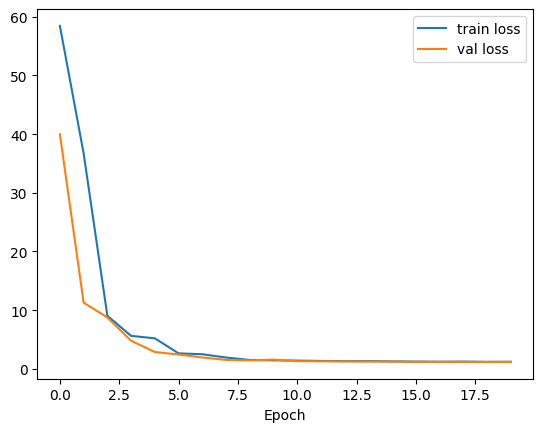

In [19]:
plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.plot()

In [20]:
import numpy as np
import pandas as pd


data = pd.read_csv("/content/drive/MyDrive/data_KC.csv", sep = ";" , header=0)
images = np.load("/content/drive/MyDrive/images_KC.npy")

In [21]:
print(images.shape)
print(data.shape)

(2135, 224, 224, 3)
(2135, 30)


In [22]:
# Vemos que ya están normalizadas.
images[0,:,:,:]

array([[[0.68235296, 0.5764706 , 0.40784314],
        [0.6745098 , 0.5686275 , 0.4       ],
        [0.6745098 , 0.54901963, 0.3882353 ],
        ...,
        [0.5647059 , 0.49019608, 0.3647059 ],
        [0.5647059 , 0.49019608, 0.3647059 ],
        [0.5647059 , 0.49019608, 0.3647059 ]],

       [[0.68235296, 0.5764706 , 0.40784314],
        [0.6745098 , 0.5686275 , 0.4       ],
        [0.6745098 , 0.5529412 , 0.39215687],
        ...,
        [0.5647059 , 0.49019608, 0.3647059 ],
        [0.5647059 , 0.49019608, 0.3647059 ],
        [0.5647059 , 0.49019608, 0.3647059 ]],

       [[0.68235296, 0.5764706 , 0.40784314],
        [0.6745098 , 0.5686275 , 0.4       ],
        [0.6784314 , 0.5529412 , 0.39215687],
        ...,
        [0.5647059 , 0.49019608, 0.3647059 ],
        [0.5647059 , 0.49019608, 0.3647059 ],
        [0.5647059 , 0.49019608, 0.3647059 ]],

       ...,

       [[0.44705883, 0.36862746, 0.2627451 ],
        [0.43529412, 0.35686275, 0.2509804 ],
        [0.4392157 , 0

In [23]:
train_x_imgs = images[idx_train, :,:,:]
val_x_imgs = images[idx_val, :,:,:]
test_x_imgs = images[idx_test, :,:,:]
# Imágenes:
(train_x_imgs.shape, val_x_imgs.shape, test_x_imgs.shape)

((1331, 224, 224, 3), (235, 224, 224, 3), (523, 224, 224, 3))

In [24]:
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.constraints import max_norm

def create_2D_CNN(input_shape, filters=(16, 32, 64), n_classes = 3, chanDim=3):

  base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

  for layer in base_model.layers:
    layer.trainable = False
    print('Capa ' + layer.name + ' congelada.')


  last = base_model.layers[-1].output
  x = GlobalMaxPooling2D()(last)
  x = Dense(1024, activation='relu')(x)
  x = Dense(n_classes, activation='softmax', name='predictions')(x)
  model = Model(base_model.input, x)


  model.summary()
  return model

In [25]:
import keras
from tensorflow.keras.optimizers import SGD


n_epochs = 40
batch_size = 64
lr = 0.0001
model2D = create_2D_CNN((224,224,3), n_classes = 3)
earlyStopping_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5,
)

model2D.compile(loss="categorical_crossentropy", optimizer=SGD(lr), metrics=["accuracy"])
H = model2D.fit(train_x_imgs, y_train, validation_data=(val_x_imgs, y_val), epochs=n_epochs, batch_size=batch_size, callbacks=[earlyStopping_callback])

predictions2D_train = model2D.predict(train_x_imgs, batch_size=batch_size)
predictions2D_val = model2D.predict(val_x_imgs, batch_size=batch_size)
predictions2D_test = model2D.predict(test_x_imgs, batch_size=batch_size)

print(classification_report(y_test.values.argmax(axis=1), predictions2D_test.argmax(axis=1)))

58889256/58889256 [==============================] - 0s 0us/step
Capa input_2 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_pool congelada.
Capa block4_conv1 congelada.
Capa block4_conv2 congelada.
Capa block4_conv3 congelada.
Capa block4_pool congelada.
Capa block5_conv1 congelada.
Capa block5_conv2 congelada.
Capa block5_conv3 congelada.
Capa block5_pool congelada.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                               

[]

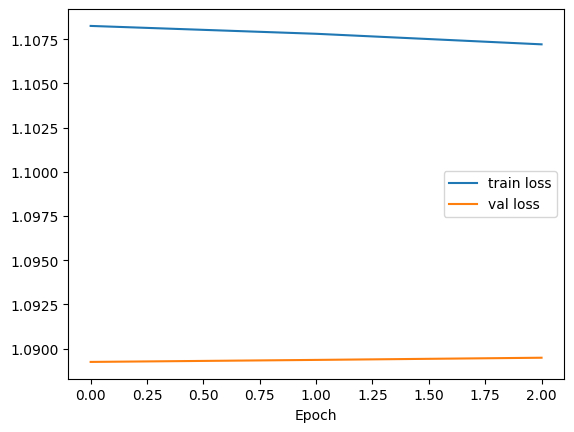

In [26]:
plt.plot(H.history['loss'][3::], label='train loss')
plt.plot(H.history['val_loss'][3::], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.plot()

In [31]:
# Late Fusion.

# Creamos los atributos de entrada
late_fusion_features_train = np.concatenate((predictions1D_train, predictions2D_train), axis=1)
late_fusion_features_val = np.concatenate((predictions1D_val, predictions2D_val), axis=1)
late_fusion_features_test = np.concatenate((predictions1D_test, predictions2D_test), axis=1)
print(late_fusion_features_train.shape)
print(late_fusion_features_val.shape)
print(late_fusion_features_test.shape)


(1331, 6)
(235, 6)
(523, 6)


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

late_fusion_model = RandomForestClassifier(n_estimators=100, random_state=42)

y_train_new = y_train.values.argmax(axis=1)
y_val_new = y_val.values.argmax(axis=1)
y_test_new = y_test.values.argmax(axis=1)

late_fusion_model.fit(late_fusion_features_train, y_train_new)

y_pred_train = late_fusion_model.predict(late_fusion_features_train)
y_pred_val = late_fusion_model.predict(late_fusion_features_val)
y_pred_test = late_fusion_model.predict(late_fusion_features_test)
cm = confusion_matrix(y_test_new, y_pred_test)
print(cm)

[[71 61 48]
 [64 50 53]
 [61 51 64]]


In [39]:
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
import numpy as np

In [44]:
# Early Fusion.
# Opción: Concatenar datos de entrada tabulares con embeddings de CNNs pre-entrenadas alimentadas con imágenes
classifier2D = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
last_conv = classifier2D.layers[-2].output
last_conv_globalAvg = GlobalAveragePooling2D()(last_conv)
feature_extractor = Model(classifier2D.input, last_conv_globalAvg)

# vemos la estructura del modelo
feature_extractor.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [45]:
# Preprocesar las imágenes según VGG16


early_2d_train_imgs = feature_extractor.predict(train_x_imgs)
early_2d_val_imgs = feature_extractor.predict(val_x_imgs)
early_2d_test_imgs = feature_extractor.predict(test_x_imgs)

17/17 [==============================] - 2s 109ms/step


In [46]:
# Concatenamos los atributos de entrada
early_fusion_features_train = np.concatenate((x_train, early_2d_train_imgs), axis=1)
early_fusion_features_val = np.concatenate((x_val, early_2d_val_imgs), axis=1)
early_fusion_features_test = np.concatenate((x_test, early_2d_test_imgs), axis=1)
print(early_fusion_features_train.shape)
print(early_fusion_features_val.shape)
print(early_fusion_features_test.shape)


(1331, 531)
(235, 531)
(523, 531)


[[148   0  32]
 [136   0  31]
 [143   0  33]]


<Axes: >

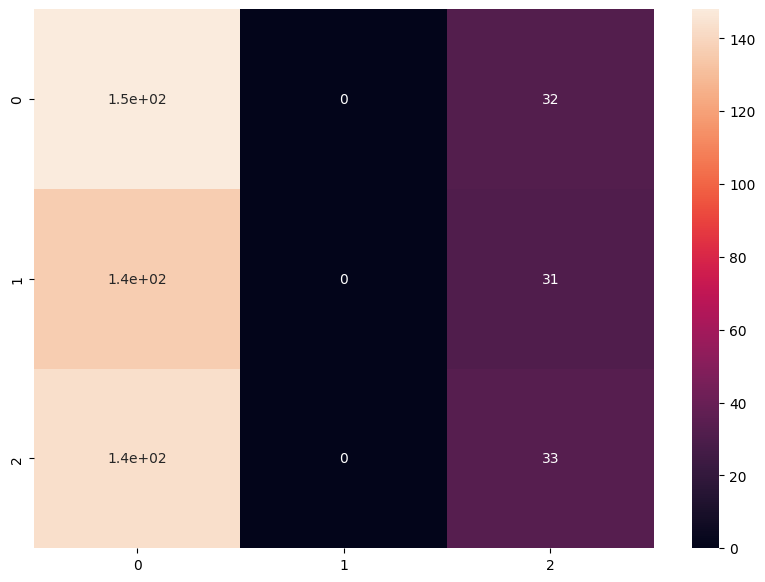

In [47]:
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, r2_score
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


# Creamos el modelo de early fusion:
early_fusion_model = svm.SVC()
early_fusion_model.fit(early_fusion_features_train, y_train_new)

y_pred_train = early_fusion_model.predict(early_fusion_features_train)
y_pred_val = early_fusion_model.predict(early_fusion_features_val)
y_pred_test = early_fusion_model.predict(early_fusion_features_test)
cm = confusion_matrix(y_test_new, y_pred_test)
print(cm)
# Para plotear la matriz de confusión:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)